In [432]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import pickle
from gprofiler import GProfiler

In [221]:
def enrich(query, background, return_full=False, organism='hsapiens', sources=['GO:BP']):
    gp = GProfiler(return_dataframe=True, user_agent='g:GOSt')

    df = gp.profile(
        organism=organism, sources=sources, user_threshold=0.05,
        significance_threshold_method='fdr',
        background=list(background),
        query=list(query),
        no_evidences=False)

    if return_full:
        return df
    else:
        return df[['name', 'p_value', 'intersections']]

In [465]:
adata = ad.read_h5ad("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_pmd.h5ad")
multilevel_results = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-results", "rb")
)
multilevel_mcps = pickle.load(
    open("../../tmp_dialogue_experiments/data/v2/uc-dialogue-reduced-output-lp/uc-dialogue-reduced_multilevel-mcps", "rb")
)

In [223]:
genes = adata.var_names
genes

Index(['SUMO4', 'PROX1', 'ZNF485', 'C12orf57', 'CNN1', 'NLGN4Y', 'FAM46C',
       'COX10-AS1', 'C12orf10', 'MDH1',
       ...
       'PTPN21', 'MDC1', 'PAPOLB', 'TOB1-AS1', 'TSC22D4', 'MOGAT3',
       'RP11-21M24.2', 'POLR2H', 'MIR17HG', 'MT-TL1'],
      dtype='object', length=1817)

In [224]:
sig_genes_fibro = multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.down'] +  multilevel_results['fibroblast_vs_epithelial']['MCP1']['sig_genes_1']['MCP1.up']
sig_genes_immune = multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_1']['MCP1.down']+ multilevel_results['immune_vs_fibroblast']['MCP1']['sig_genes_1']['MCP1.up']
sig_genes_epithelial = multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.down'] + multilevel_results['immune_vs_epithelial']['MCP1']['sig_genes_2']['MCP1.up']

In [225]:
all_sig_genes = sig_genes_fibro + sig_genes_immune + sig_genes_epithelial

In [226]:
pathway_df = enrich(all_sig_genes, genes)
pathway_df

,name,p_value,intersections
0,biological_process,2.481751e-17,"[FAM91A1, IKZF5, PIBF1, VPS13B, ABCA1, AGO3, A..."
1,cellular process,8.771925e-16,"[FAM91A1, IKZF5, PIBF1, VPS13B, ABCA1, AGO3, A..."
2,gene expression,3.625351e-12,"[IKZF5, PIBF1, AGO3, ARID4B, ATP8B1, ATXN7, BM..."
3,macromolecule metabolic process,3.625351e-12,"[IKZF5, PIBF1, ABCA1, AGO3, ARID4B, ATP8B1, AT..."
4,nitrogen compound metabolic process,4.614820e-12,"[IKZF5, PIBF1, ABCA1, AGO3, ARID4B, ATP6V1A, A..."
...,...,...,...
286,negative regulation of locomotion,4.559433e-02,"[ARID4B, MEF2C, PLCB1, GADD45A, MIA3, OSBPL8, ..."
287,negative regulation of cell death,4.622947e-02,"[BMI1, DAB2, FSTL1, GPNMB, IL6ST, MEF2C, YWHAZ..."
288,regulation of programmed cell death,4.641427e-02,"[BMI1, DAB2, FSTL1, IL6ST, MEF2C, SERINC3, YWH..."
289,regulation of phosphorylation,4.673929e-02,"[PIBF1, BMPR2, C3, DAB2, GPNMB, IL6ST, MAP3K13..."


In [329]:
# only look at most important pathways
sig_pathways = pathway_df[pathway_df['p_value']<2.500261e-11] 
sig_pathways

,name,p_value,intersections
0,biological_process,2.481751e-17,"[FAM91A1, IKZF5, PIBF1, VPS13B, ABCA1, AGO3, A..."
1,cellular process,8.771925e-16,"[FAM91A1, IKZF5, PIBF1, VPS13B, ABCA1, AGO3, A..."
2,gene expression,3.625351e-12,"[IKZF5, PIBF1, AGO3, ARID4B, ATP8B1, ATXN7, BM..."
3,macromolecule metabolic process,3.625351e-12,"[IKZF5, PIBF1, ABCA1, AGO3, ARID4B, ATP8B1, AT..."
4,nitrogen compound metabolic process,4.614820e-12,"[IKZF5, PIBF1, ABCA1, AGO3, ARID4B, ATP6V1A, A..."
5,cellular nitrogen compound metabolic process,1.370667e-11,"[IKZF5, AGO3, ARID4B, ATP6V1A, ATP8B1, ATXN7, ..."
6,heterocycle metabolic process,2.371877e-11,"[IKZF5, AGO3, ARID4B, ATP6V1A, ATP8B1, ATXN7, ..."
7,cellular aromatic compound metabolic process,2.500261e-11,"[IKZF5, AGO3, ARID4B, ATP6V1A, ATP8B1, ATXN7, ..."
8,organic substance metabolic process,2.500261e-11,"[IKZF5, PIBF1, ABCA1, AGO3, ARID4B, ATP6V1A, A..."
9,nucleic acid metabolic process,2.500261e-11,"[IKZF5, AGO3, ARID4B, ATP8B1, ATXN7, BMI1, BMP..."


In [330]:
data = adata.X.toarray()
df_X = pd.DataFrame(data, columns=genes, index=adata.obs.index)
df_X

,SUMO4,PROX1,ZNF485,C12orf57,CNN1,NLGN4Y,FAM46C,COX10-AS1,C12orf10,MDH1,...,PTPN21,MDC1,PAPOLB,TOB1-AS1,TSC22D4,MOGAT3,RP11-21M24.2,POLR2H,MIR17HG,MT-TL1
N44.LPA.GGGAATGAGCGTTCCG-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,2.577191,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,2.442261,-0.081550,-0.055984
N46.LPB.TCAGCAAAGTACGTAA-immune,-0.032145,-0.019554,-0.050707,-0.057215,10.000000,-0.013953,-0.560755,-0.069224,-0.268769,1.535383,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
N24.LPA.CATTATCTCTCTAGGA-immune,-0.032145,-0.019554,-0.050707,0.705892,-0.022129,-0.013953,0.708476,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
N106.LPB.AAGGTTCCAGGACGTA-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
N19.LPA.CATGTACTTGGGAG-immune,-0.032145,-0.019554,-0.050707,-0.660579,-0.022129,-0.013953,-0.560755,-0.069224,-0.268769,-0.395536,...,-0.018811,-0.094404,-0.017137,-0.069245,-0.377753,-0.032433,-0.020154,-0.284496,-0.081550,-0.055984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N14.LPB.TCGAGCCTTGCCCT-epithelial,-0.034976,-0.131128,-0.085352,-0.778102,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,-0.673904,...,-0.147155,-0.133279,-0.018791,-0.110580,-0.331206,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178
N110.LPB.AGAGTGGCAGCAGTTT-epithelial,-0.034976,-0.131128,-0.085352,1.426202,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,-0.673904,...,-0.147155,-0.133279,-0.018791,-0.110580,1.863687,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178
N110.LPA.CATATGGTCGGTGTCG-epithelial,-0.034976,-0.131128,-0.085352,-0.778102,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,-0.673904,...,-0.147155,-0.133279,-0.018791,-0.110580,-0.331206,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178
N21.LPA.TTCATGTGACGGGA-epithelial,-0.034976,-0.131128,-0.085352,-0.098107,-0.012059,-0.017647,-0.273166,-0.077114,-0.379752,0.040130,...,-0.147155,-0.133279,-0.018791,-0.110580,1.164425,-0.259076,-0.023423,-0.539628,-0.079738,-0.212178


In [331]:
# get overall expression of one pathway
def get_av_expr(pathway):
    pathway_val = np.zeros((1,len(df_X))).flatten()
    for gene in pathway:
        pathway_val += df_X[gene]
    return pathway_val

In [332]:
# save it for all pathways 
pathway_val = np.zeros((len(sig_pathways),8576))
for x,pathway in enumerate(sig_pathways['intersections']):
    tmp = get_av_expr(pathway)
    pathway_val[x] = tmp
pathway_val = pathway_val.T

In [333]:
# save as df
df_pathways = pd.DataFrame(pathway_val, columns=sig_pathways['name'], index=adata.obs.index)

In [334]:
adata.obs

,Cluster,nGene,nUMI,Subject,Health,Location,Sample,cellQ,cell_type,log_nUMI,mcp_0,mcp_1,mcp_2
N44.LPA.GGGAATGAGCGTTCCG-immune,Plasma,238.0,20502.0,N44,Non-inflamed,LP,N44.LPA,0.280753,immune,9.928278,1.202523,1.063884,0.728866
N46.LPB.TCAGCAAAGTACGTAA-immune,Macrophages,2238.0,4667.0,N46,Healthy,LP,N46.LPB,0.027086,immune,8.448272,2.874559,2.217327,0.747108
N24.LPA.CATTATCTCTCTAGGA-immune,Plasma,592.0,3152.0,N24,Non-inflamed,LP,N24.LPA,0.274708,immune,8.055792,-1.622435,-1.566449,-1.431538
N106.LPB.AAGGTTCCAGGACGTA-immune,CD4+ Memory,4288.0,8336.0,N106,Inflamed,LP,N106.LPB,0.033489,immune,9.028339,0.823559,0.977053,1.379494
N19.LPA.CATGTACTTGGGAG-immune,CD4+ Memory,4932.0,10050.0,N19,Non-inflamed,LP,N19.LPA,0.098258,immune,9.215328,-0.146011,0.004276,0.465039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
N14.LPB.TCGAGCCTTGCCCT-epithelial,TA 1,365.0,640.0,N14,Inflamed,LP,N14.LPB,0.008487,epithelial,6.461468,-0.464320,-0.438929,-0.380920
N110.LPB.AGAGTGGCAGCAGTTT-epithelial,Cycling TA,2360.0,7990.0,N110,Inflamed,LP,N110.LPB,0.247375,epithelial,8.985946,2.194814,2.073045,1.598980
N110.LPA.CATATGGTCGGTGTCG-epithelial,Cycling TA,867.0,1924.0,N110,Non-inflamed,LP,N110.LPA,0.014543,epithelial,7.562162,-2.550835,-2.661952,-2.852229
N21.LPA.TTCATGTGACGGGA-epithelial,Enteroendocrine,2325.0,13540.0,N21,Healthy,LP,N21.LPA,0.295743,epithelial,9.513404,-1.942646,-1.837085,-1.402929


In [380]:
# merge by condition: healty, inflamed, non inflamed
healthy_samples = adata.obs_names[adata.obs['Health']=='Healthy']
inflamed_samples = adata.obs_names[adata.obs['Health']=='Inflamed']
non_inflamed_samples = adata.obs_names[adata.obs['Health']=='Non-inflamed']
Healthy = np.zeros((1,len(sig_pathways)))
Inflamed = np.zeros((1,len(sig_pathways)))
Non_inflamed = np.zeros((1,len(sig_pathways)))
for rowname in df_pathways.index:
    if rowname in healthy_samples:
        Healthy[0]+=df_pathways.loc[rowname]
    elif rowname in inflamed_samples:
        Inflamed[0]+= df_pathways.loc[rowname]
    elif rowname in non_inflamed_samples:
        Non_inflamed[0] += df_pathways.loc[rowname]
all_pathway_expr = np.array([Healthy[0],Inflamed[0],Non_inflamed[0]])
df_all_pathways = pd.DataFrame(all_pathway_expr, index=['Healthy', 'Inflamed','Non-Inflamed'], columns=sig_pathways['name'])
#df_all_pathways
adata_all_pathways = ad.AnnData(df_all_pathways, 
    pd.DataFrame(['Healthy', 'Inflamed', 'Non-Inflamed'], index =df_all_pathways.index,columns=["Health"]),
    df_all_pathways.columns.to_frame())
sc.pl.matrixplot(adata_all_pathways, adata_all_pathways.var['name'] , groupby='Health', title="biological process")

'# merge by condition: healty, inflamed, non inflamed\nhealthy_samples = adata.obs_names[adata.obs[\'Health\']==\'Healthy\']\ninflamed_samples = adata.obs_names[adata.obs[\'Health\']==\'Inflamed\']\nnon_inflamed_samples = adata.obs_names[adata.obs[\'Health\']==\'Non-inflamed\']\nHealthy = np.zeros((1,len(sig_pathways)))\nInflamed = np.zeros((1,len(sig_pathways)))\nNon_inflamed = np.zeros((1,len(sig_pathways)))\nfor rowname in df_pathways.index:\n    if rowname in healthy_samples:\n        Healthy[0]+=df_pathways.loc[rowname]\n    elif rowname in inflamed_samples:\n        Inflamed[0]+= df_pathways.loc[rowname]\n    elif rowname in non_inflamed_samples:\n        Non_inflamed[0] += df_pathways.loc[rowname]\nall_pathway_expr = np.array([Healthy[0],Inflamed[0],Non_inflamed[0]])\ndf_all_pathways = pd.DataFrame(all_pathway_expr, index=[\'Healthy\', \'Inflamed\',\'Non-Inflamed\'], columns=sig_pathways[\'name\'])\n#df_all_pathways\nadata_all_pathways = ad.AnnData(df_all_pathways, \n    pd.Data

# mean over all samples groubed by condition

In [342]:
# merge by condition: healty, inflamed, non inflamed
healthy_samples = adata.obs_names[adata.obs['Health']=='Healthy']
inflamed_samples = adata.obs_names[adata.obs['Health']=='Inflamed']
non_inflamed_samples = adata.obs_names[adata.obs['Health']=='Non-inflamed']

Healthy_m = []
Inflamed_m = []
Non_inflamed_m = []
for rowname in df_pathways.index:
    if rowname in healthy_samples:
        Healthy_m.append(df_pathways.loc[rowname].values)
    elif rowname in inflamed_samples:
        Inflamed_m.append(df_pathways.loc[rowname].values)
    elif rowname in non_inflamed_samples:
        Non_inflamed_m.append(df_pathways.loc[rowname].values)

Healthy_mean = np.mean(Healthy_m, axis = 0)
Inflamed_mean = np.mean(Inflamed_m, axis = 0)
Non_inflamed_mean = np.mean(Non_inflamed_m, axis = 0)


In [343]:
all_pathway_expr_mean = np.array([Healthy_mean,Inflamed_mean,Non_inflamed_mean])

In [344]:
df_all_pathways_mean = pd.DataFrame(all_pathway_expr_mean, index=['Healthy', 'Inflamed','Non-Inflamed'], columns=sig_pathways['name'])
df_all_pathways_mean


name,biological_process,cellular process,gene expression,macromolecule metabolic process,nitrogen compound metabolic process,cellular nitrogen compound metabolic process,heterocycle metabolic process,cellular aromatic compound metabolic process,organic substance metabolic process,nucleic acid metabolic process,nucleobase-containing compound metabolic process,regulation of gene expression
Healthy,-14.235619,-13.798680,-8.332252,-10.066115,-10.229767,-8.154517,-7.495302,-7.647449,-10.723809,-7.174744,-7.617356,-7.093340
Inflamed,10.264302,9.981913,6.490792,7.829822,7.896856,6.518243,5.784565,5.855606,8.026789,5.616362,5.831989,5.176576
Non-Inflamed,11.931334,11.166458,8.187933,9.667467,9.505226,7.933197,7.130018,7.227046,10.009386,6.897193,7.137511,6.201325


In [345]:
adata_all_pathways_mean = ad.AnnData(all_pathway_expr_mean, 
    pd.DataFrame(['Healthy', 'Inflamed', 'Non-Inflamed'], index =df_all_pathways_mean.index,columns=["Health"]),
    df_all_pathways_mean.columns.to_frame())

/gpfs/scratch/pn25xo/gobi003/gobi003/ipykernel_53073/2645143568.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_all_pathways_mean = ad.AnnData(all_pathway_expr_mean,


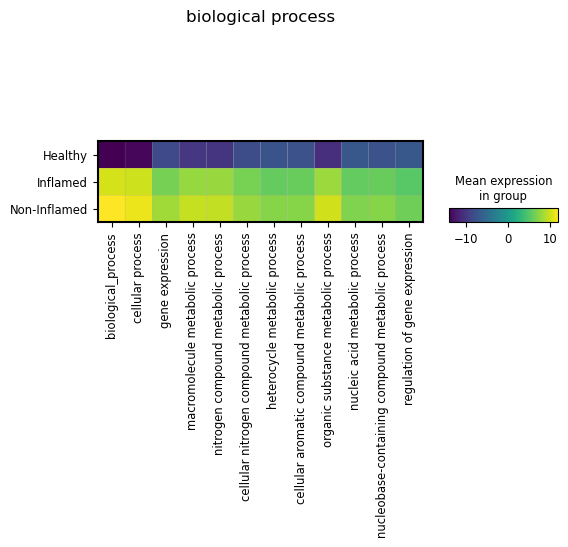

In [346]:
sc.pl.matrixplot(adata_all_pathways_mean, adata_all_pathways_mean.var['name'] , groupby='Health', title="biological process")

## further look into biological process 

In [363]:
bio_process_genes = sig_pathways['intersections'][0]

In [359]:
'''gene_loc = []
for genename in bio_process_genes:
    gene_loc.append(np.where(adata.var_names == genename)[0][0])'''

In [369]:
adata_subset = adata[:, bio_process_genes] 
print(adata_subset.X)

  (0, 194)	-0.019553602
  (0, 157)	-0.66057944
  (0, 95)	-0.39553586
  (0, 119)	-0.113967314
  (0, 89)	0.996509
  (0, 91)	-0.35693315
  (0, 145)	-0.26814228
  (0, 97)	-0.19818264
  (0, 53)	-0.24964473
  (0, 72)	-0.12466378
  (0, 52)	-0.1351406
  (0, 171)	-0.102353714
  (0, 122)	-0.18435736
  (0, 117)	-0.13737004
  (0, 200)	-0.10130608
  (0, 182)	-0.23969227
  (0, 75)	-0.2642849
  (0, 37)	-0.28930116
  (0, 183)	0.8160222
  (0, 158)	-0.5230444
  (0, 211)	-0.30739403
  (0, 201)	-0.04531007
  (0, 160)	-0.42062125
  (0, 81)	-0.2219937
  (0, 82)	-0.15761928
  :	:
  (8575, 96)	-0.07604263
  (8575, 120)	-0.20307794
  (8575, 170)	-0.10982181
  (8575, 71)	1.7972313
  (8575, 56)	0.6442141
  (8575, 59)	-0.01646516
  (8575, 110)	-0.25925148
  (8575, 50)	1.6128833
  (8575, 55)	-0.1938165
  (8575, 93)	-0.3098145
  (8575, 187)	-0.28946307
  (8575, 186)	-0.13614103
  (8575, 155)	-0.09396312
  (8575, 205)	-0.12794529
  (8575, 174)	1.827902
  (8575, 76)	-0.08176297
  (8575, 39)	-0.10447362
  (8575, 136)	

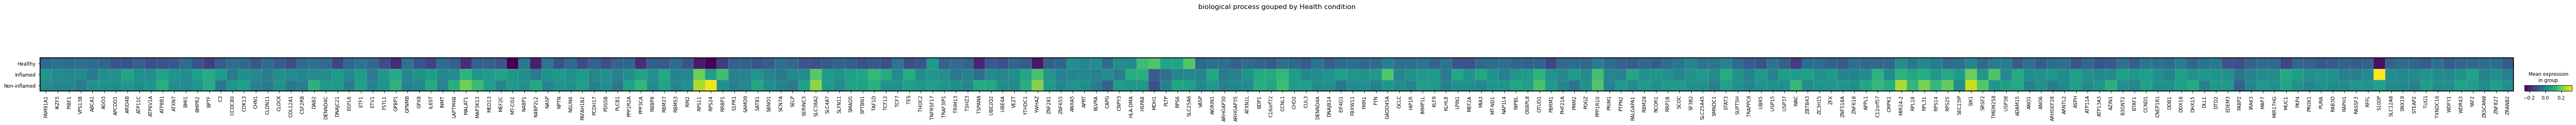

In [375]:
sc.pl.matrixplot(adata_subset, adata_subset.var_names, groupby='Health', title="biological process grouped by Health condition")


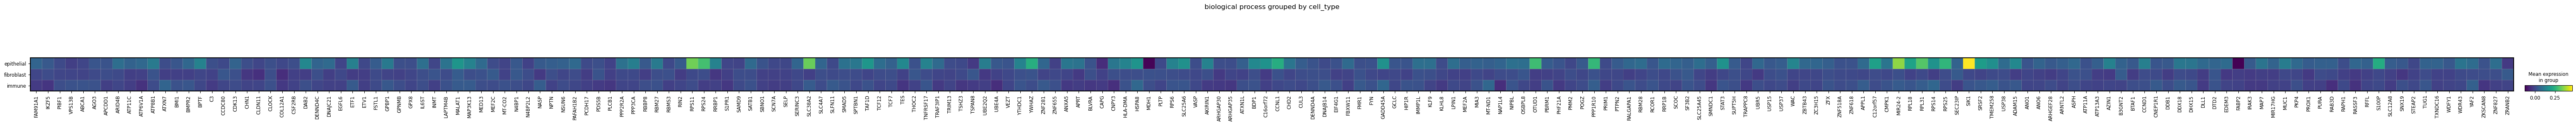

In [381]:
sc.pl.matrixplot(adata_subset, adata_subset.var_names, groupby='cell_type', title="biological process grouped by cell_type")


In [387]:
sc.tl.rank_genes_groups(adata, sig_pathways['intersections'][0])


KeyError: "None of [Index(['FAM91A1', 'IKZF5', 'PIBF1', 'VPS13B', 'ABCA1', 'AGO3', 'APCDD1',\n       'ARID4B', 'ATP11C', 'ATP6V1A',\n       ...\n       'SNX19', 'STEAP2', 'TUG1', 'TXNDC16', 'WDFY1', 'WDR43', 'YAF2',\n       'ZKSCAN8', 'ZNF827', 'ZRANB2'],\n      dtype='object', length=212)] are in the [columns]"

In [393]:
adata.obs

,bulk_labels,n_genes,percent_mito,n_counts,S_score,G2M_score,phase,louvain
index,,,,,,,,
AAAGCCTGGCTAAC-1,CD14+ Monocyte,1003,0.023856,2557.0,-0.119160,-0.816889,G1,1
AAATTCGATGCACA-1,Dendritic,1080,0.027458,2695.0,0.067026,-0.889498,S,1
AACACGTGGTCTTT-1,CD56+ NK,1228,0.016819,3389.0,-0.147977,-0.941749,G1,3
AAGTGCACGTGCTA-1,CD4+/CD25 T Reg,1007,0.011797,2204.0,0.065216,1.469291,G2M,9
ACACGAACGGAGTG-1,Dendritic,1178,0.017277,3878.0,-0.122974,-0.868185,G1,2
...,...,...,...,...,...,...,...,...
TGGCACCTCCAACA-8,Dendritic,1166,0.008840,3733.0,-0.124456,-0.867484,G1,2
TGTGAGTGCTTTAC-8,Dendritic,1014,0.022068,2311.0,-0.298056,-0.649070,G1,1
TGTTACTGGCGATT-8,CD4+/CD25 T Reg,1079,0.012821,3354.0,0.216895,-0.527338,S,0


In [463]:
print(len(all_sig_genes))
print(len(set(all_sig_genes)))

341
247


In [467]:
adata_sig_genes = adata[:, list(set(all_sig_genes))] 
adata_sig_genes

View of AnnData object with n_obs × n_vars = 8576 × 247
    obs: 'Cluster', 'nGene', 'nUMI', 'Subject', 'Health', 'Location', 'Sample', 'cellQ', 'cell_type', 'log_nUMI', 'mcp_0', 'mcp_1', 'mcp_2'
    obsm: 'X_pca'

In [476]:
sc.tl.rank_genes_groups(adata_sig_genes, 'Health', method='t-test')

/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [449]:
var_names = {"biological_process": sig_pathways['intersections'][0],
              'cellular process':sig_pathways['intersections'][1],
              'gene expression': sig_pathways['intersections'][2] }

In [470]:
var_names = {"biological_process": sig_pathways['intersections'][0]}

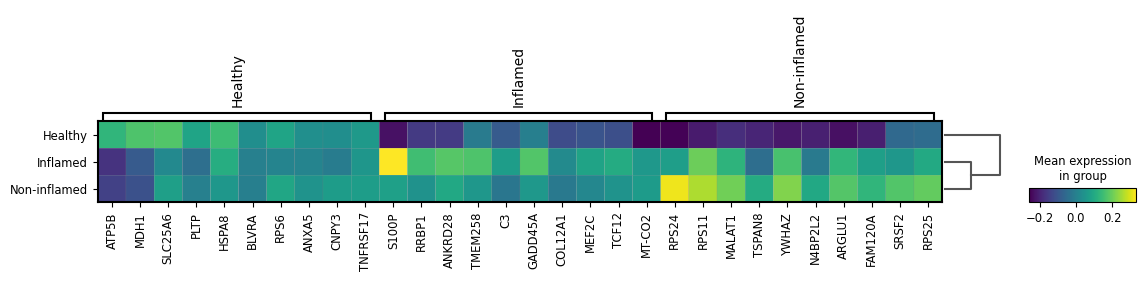

In [472]:
sc.pl.rank_genes_groups_matrixplot(
    adata_sig_genes
)

categories: Healthy, Inflamed, Non-inflamed
var_group_labels: epithelial, fibroblast, immune


/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/dss/dsshome1/lxc08/gobi003/miniconda3/envs/pertpy_env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


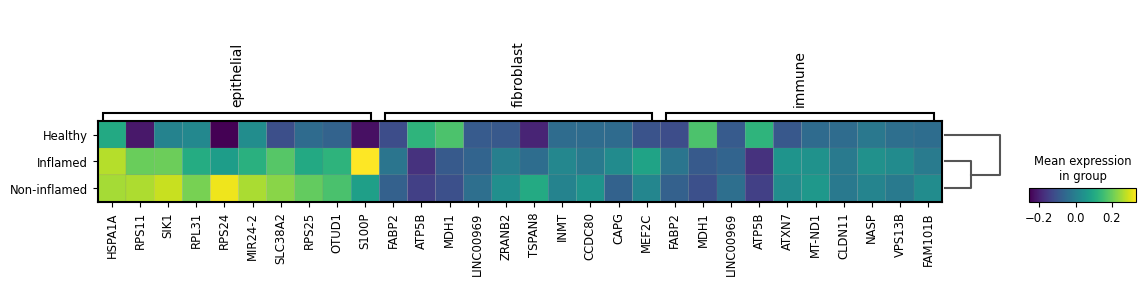

In [474]:
sc.tl.rank_genes_groups(adata_sig_genes, 'cell_type', method='t-test')
sc.pl.rank_genes_groups_matrixplot(
    adata_sig_genes,
    groupby='Health'
)